In [1]:
#Neural Network classification with Pytorch

#classification is a problem of predicting weather something is one thing or another(there can be multiple things as the options)

#Make classification data and get it ready

import sklearn
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

#create circles
X,y=make_circles(n_samples,
                noise=0.3,
                random_state=42)

In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
print(f"First 5 of X:{X[:5]}")
print(f"First 5 of y:{y[:5]}")

First 5 of X:[[ 0.59171471  0.43674853]
 [-0.45745002  0.36160118]
 [-1.01069349  0.83042101]
 [-0.87169639  0.41407292]
 [ 0.48803455 -0.87258708]]
First 5 of y:[1 1 1 1 0]


In [4]:
#Create a dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "label":y})
circles.head(10)

,X1,X2,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
5,-0.347874,1.103071,1
6,-0.046008,0.834056,1
7,0.610994,0.306608,1
8,-0.255312,-0.879601,1
9,0.025255,1.300938,0


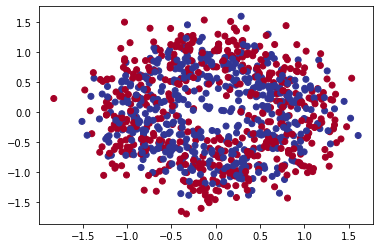

In [5]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],
                c=y,
                cmap=plt.cm.RdYlBu)

In [6]:
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [7]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [8]:
#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [10]:
#Model Building
#let's Build a model to classify our blue and red dots.
#1.Setup device agonastic code so our code will run on an accelerate(GPU) if there is one 
#2.Construct a Model by using `nn.Module` 
#3.Define loss function and optimizer
#4.Create training and testing loop

In [11]:
import torch
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [12]:
#Now we've setup device agnostic code,let's create a model:
#1.subclass `nn.Module`(almost all models of pytorch subclass nn.Module)
#2.Create 2 nn.Linear() layers that are capable of handling the shapes of our data
#3.Define a forward() method that outlines the forward pass(or forward computation) of the model
#4.instatiate an instance of our model class and send it to target device 

In [13]:
from sklearn import datasets
#1.Construct a model that subclass nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        #2.Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer_1=nn.Linear(in_features=2,out_features=5) #takes 2 features and upscale to 5 features
        self.layer_2=nn.Linear(in_features=5,out_features=1) #takes 5 features from previous layer and output a single feature(same shape as y)
    
    #3.Define a forward() method that outlines the forward pass    
    def forward(self,x):
       return self.layer_2(self.layer_1(x)) #x----->layer1----->layer2----->output
 
#4.Instatiate an instance of our model class and send it to the target device   
model_0=CircleModelv0().to(device)
model_0

   

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
#or u can create model like this also
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__()
        self.two_layers_seq=nn.Sequential(
            nn.Linear(in_features=2,out_features=5),
            nn.Linear(in_features=5,out_features=1)
        )
    
    def forward(self,x):
        return self.two_layers_seq
    
model_1=CircleModelv1().to(device)
model_1

CircleModelv1(
  (two_layers_seq): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [15]:
#Let's replicate the model above using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
next(model_0.parameters()).device


device(type='cpu')

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0564, -0.4755],
                      [ 0.2747, -0.3401],
                      [-0.2935, -0.0878],
                      [-0.2827, -0.0980],
                      [ 0.5111, -0.2717]])),
             ('0.bias', tensor([-0.1098, -0.1944,  0.4204, -0.4891,  0.2363])),
             ('1.weight',
              tensor([[-0.3847, -0.2788,  0.4390,  0.2925, -0.2192]])),
             ('1.bias', tensor([0.2287]))])

In [18]:
#define a loss function
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss=sigmoid activation function built-in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [27]:
#claculate the accuracy-out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    print(correct)
    return acc

print(correct)

NameError: name 'correct' is not defined

In [20]:
#Train Model
#1.Forwardpass
#2.Calculate the loss
#3.Optimizer zero grade
#4.loss Backward(Backpropgation)
#5.Optimizer step (Gradient descent)

In [21]:
#Going from raw logits.
#we cn convert these logits into prediction probabilities by passing them to some kind of activation function
# (eg:sigmoid for binary classification and softmax for multiclass classification)
#Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax().
 

In [28]:
#view the first 5 outputs of the forward pass on the test data
model_0.eval()
with  torch.inference_mode():
    y_logits=model_0(X_test.to(device))[:5]
y_logits 
print(y_logits.squeeze()) 

tensor([ 0.5438,  0.2508,  0.4504,  0.5787, -0.1149])


In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [24]:
#Use the sigmoid avtivation function on our model logits to turn them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6327],
        [0.5624],
        [0.6107],
        [0.6408],
        [0.4713]])

In [25]:
#Find the predicted labels
y_preds=torch.round(y_pred_probs)

y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

print(y_preds.squeeze())
print(y_preds)

tensor([True, True, True, True, True])
tensor([1., 1., 1., 1., 0.])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])


In [32]:
#Training the Model
torch.manual_seed(42)
#torch.cuda.manual_seed(42) #used when using the GPU
epochs=100

'''X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)''' #------> while using GPU

for epoch in range(epochs):
    #Training
    model_0.train()
    
    #1.Forward pass
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits)) #turn logits----->pred probs----->pred labels
    
    
    #2.Calculate the loss/accuracy
    #loss=loss_fn(torch.sigmoid(y_logits),y_train) #nn.BCELoss expects prediction prbobilities as input
    
    loss=loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input 
                 y_train)
    acc=accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
    
    #3.Optimizer zero grads
    optimizer.zero_grad()
    
    #l4.oss backward(backpropgation)
    loss.backward()
    
    #5.optimizer step (gradient descent)
    optimizer.step()
    
    
    #Testing
    model_0.eval()
    with torch.inference_mode():
        #Forward pass
        test_logits=model_0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        #loss function
        test_loss=loss_fn(test_logits,
                         y_test)
        test_acc=accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
        
     #Print what happenning
    if epoch%10==0:
        print(f"Epoch:{epoch} | Training Loss:{loss:.5f} | Training accuracy:{acc:.2f}% | Test Loss{test_loss:.5f} | Testing accuracy: {test_acc:.2f}%")
        
    
    
    

Epoch:0 | Training Loss:0.69430 | Training accuracy:51.50% | Test Loss0.69638 | Testing accuracy: 50.00%
Epoch:10 | Training Loss:0.69407 | Training accuracy:51.25% | Test Loss0.69607 | Testing accuracy: 50.00%
Epoch:20 | Training Loss:0.69389 | Training accuracy:51.00% | Test Loss0.69582 | Testing accuracy: 50.00%
Epoch:30 | Training Loss:0.69373 | Training accuracy:50.62% | Test Loss0.69561 | Testing accuracy: 50.50%
Epoch:40 | Training Loss:0.69361 | Training accuracy:50.75% | Test Loss0.69543 | Testing accuracy: 51.00%
Epoch:50 | Training Loss:0.69350 | Training accuracy:50.12% | Test Loss0.69528 | Testing accuracy: 50.50%
Epoch:60 | Training Loss:0.69342 | Training accuracy:50.12% | Test Loss0.69515 | Testing accuracy: 51.00%
Epoch:70 | Training Loss:0.69335 | Training accuracy:50.12% | Test Loss0.69504 | Testing accuracy: 51.50%
Epoch:80 | Training Loss:0.69329 | Training accuracy:50.25% | Test Loss0.69495 | Testing accuracy: 51.00%
Epoch:90 | Training Loss:0.69324 | Training acc

In [33]:
import requests
from pathlib import Path

#Downloading the helper function
if Path("helper_function.py").is_file():
    print("helper_function.py already exist")
else:
    print("Download helper_function.py ")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)
        
    

Download helper_function.py 


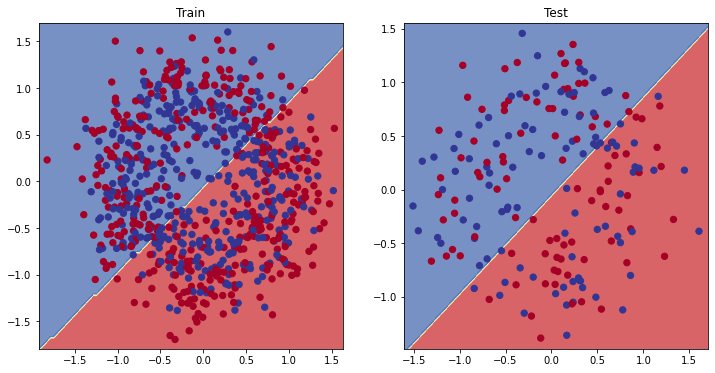

In [34]:
from helper_function import plot_predictions,plot_decision_boundary
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [35]:
#Improving the Model(from a model prespective)
#1.Add more layers-give the model more chances to learn about patterns in the data
#2.Add more hidden units-go from 5 hidden units to 10 hidden units 
#3.Fit for longer
#4.Changing the activation function
#5.Change the learning rate
#6.Change the loss function

#These options are all from a model's  prespective  because they deal directly with the model,rather then the data




In [39]:
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__ () 
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        
        
    def forward(self,x):
       # z=self.layer_1(x)  
       # z=self.layer_2(z)
       # z=self.layer_3(z)
    	return self.layer_3(self.layer_2(self.layer_1(x)))
model_1=CircleModelv1()
model_1
    

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3653,  0.1282],
                      [-0.2518,  0.3691],
                      [ 0.3716,  0.2644],
                      [-0.1243, -0.1872],
                      [ 0.0756, -0.1249],
                      [-0.2107,  0.4520],
                      [ 0.6077, -0.0700],
                      [-0.1583,  0.0103],
                      [-0.0422,  0.1700],
                      [ 0.1982, -0.6422]])),
             ('layer_1.bias',
              tensor([-0.2609,  0.5955,  0.2755, -0.0352, -0.4263, -0.4326, -0.6334, -0.2305,
                       0.2388,  0.4509])),
             ('layer_2.weight',
              tensor([[ 0.1460, -0.2795, -0.1902, -0.0499,  0.3059,  0.0457, -0.0819,  0.1308,
                       -0.1204, -0.2047],
                      [ 0.2308, -0.1438, -0.0634, -0.3146,  0.2116,  0.2396,  0.1152, -0.2205,
                       -0.3121, -0.2568],
                      [ 0.2358,  0.1518,  0.2661,  0.1657,  0.0800, -0.0

In [41]:
#Loss function
loss_fn=nn.BCEWithLogitsLoss()

#Optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                         lr=0.1)

In [46]:
X_train.dtype

torch.float32

In [53]:
torch.manual_seed(42)
Epochs=2000

#Training loop
for epoch in range(Epochs):
    model_1.train()
    y_logits=model_1(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    
    loss=loss_fn(y_logits,y_train)
    train_accuracy=accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
	#Testing
    model_1.eval()
    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        loss_test=loss_fn(test_logits,y_test)
        test_accuracy=accuracy_fn(y_true=y_test,y_pred=test_pred)
        
        
    if epoch%10==0:
        print(f"Epochs:{epoch} | Training loss:{loss:.5f} | Training accuracy:{train_accuracy:.2f} | Testing loss:{loss_test:.5f} | Testing accuracy:{test_accuracy:.2f}")

Epochs:0 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:10 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:20 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:30 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:40 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:50 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:60 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:70 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:80 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:90 | Training loss:0.6

Epochs:800 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:810 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:820 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:830 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:840 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:850 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:860 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:870 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:880 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:890 | Traini

Epochs:1590 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:1600 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:1610 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:1620 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:1630 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:1640 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:1650 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:1660 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:1670 | Training loss:0.69297 | Training accuracy:52.00 | Testing loss:0.69445 | Testing accuracy:49.50
Epochs:168

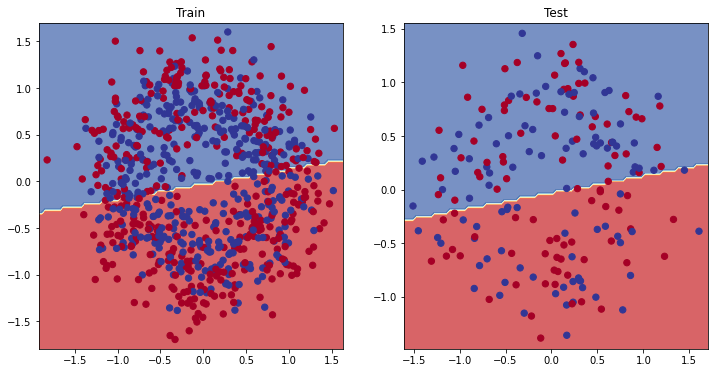

In [55]:
from helper_function import plot_predictions,plot_decision_boundary
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)